In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.batchnorm1 = nn.BatchNorm2d(128)
        self.batchnorm2 = nn.BatchNorm2d(512)

        self.dropout = nn.Dropout2d(p=0.5)

        self.fc4 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)

        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.batchnorm1(x)
        x = self.maxpool(x)
        x = self.dropout(x)

        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = self.batchnorm2(x)
        x = self.maxpool(x)
        x = self.dropout(x)

        return x

In [3]:
data_directory = './data/Train-Test Set'

transform = transforms.Compose([
    transforms.Resize((640, 480)),
    transforms.ToTensor(),
])

custom_dataset = ImageFolder(root=data_directory, transform=transform)

In [4]:
torch.manual_seed(42)

In [5]:
batch_size = 32
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [6]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(640, 480, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((3, 3)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [7]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 478, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 319, 239, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 237, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 158, 118, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 116, 256)     295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 52, 38, 256)       0

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './data/Train-Test Set/Training',
    target_size=(640, 480),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    './data/Train-Test Set/Validation',
    target_size=(640, 480),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    './data/Train-Test Set/Testing',
    target_size=(640, 480),
    batch_size=32,
    class_mode='binary'
)

Found 116 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [10]:
model2.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

C:\Users\user\AppData\Local\Temp\ipykernel_820\1707472198.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(


Epoch 1/10
4/4 [==============================] - 42s 12s/step - loss: 4.0530 - accuracy: 0.4310 - val_loss: 0.6843 - val_accuracy: 0.5789
Epoch 2/10
4/4 [==============================] - 36s 9s/step - loss: 0.6989 - accuracy: 0.5776 - val_loss: 0.6899 - val_accuracy: 0.5789
Epoch 3/10
4/4 [==============================] - 38s 10s/step - loss: 0.6846 - accuracy: 0.5862 - val_loss: 0.6901 - val_accuracy: 0.5789
Epoch 4/10
4/4 [==============================] - 37s 9s/step - loss: 0.6875 - accuracy: 0.5862 - val_loss: 0.6881 - val_accuracy: 0.5789
Epoch 5/10
4/4 [==============================] - 38s 9s/step - loss: 0.6855 - accuracy: 0.5862 - val_loss: 0.6826 - val_accuracy: 0.5789
Epoch 6/10
4/4 [==============================] - 37s 9s/step - loss: 0.6857 - accuracy: 0.5862 - val_loss: 0.6805 - val_accuracy: 0.5789
Epoch 7/10
4/4 [==============================] - 37s 9s/step - loss: 0.6741 - accuracy: 0.5862 - val_loss: 0.6809 - val_accuracy: 0.5789
Epoch 8/10
4/4 [================

In [11]:
model2.save('cnn_only.h5')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


C:\Users\user\AppData\Local\Temp\ipykernel_820\1406020304.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model2.predict_generator(test_generator)


Confusion matrix, without normalization
[[ 0 20]
 [ 0 28]]


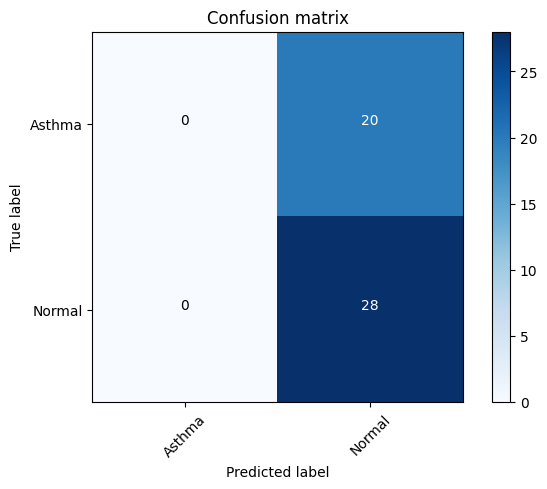

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

predictions = model2.predict_generator(test_generator)
y_pred = np.round(predictions).astype(int).flatten()  # Convert probabilities to class labels

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, classes=validation_generator.class_indices.keys())

plt.show()